In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

In [0]:
##Import data:
finaldata=pd.read_csv('FinalData.csv')

In [0]:
X = finaldata.loc[:, (finaldata.columns != 'Attrition1') & (finaldata.columns != 'Attrition2')]
y = finaldata['Attrition1']

**Create Training and Test Sets and Apply Scaling**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Building Models**

***Logistic Regression***

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.85


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


***Decision Tree***

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 <a list of 60 Text xticklabel objects>)

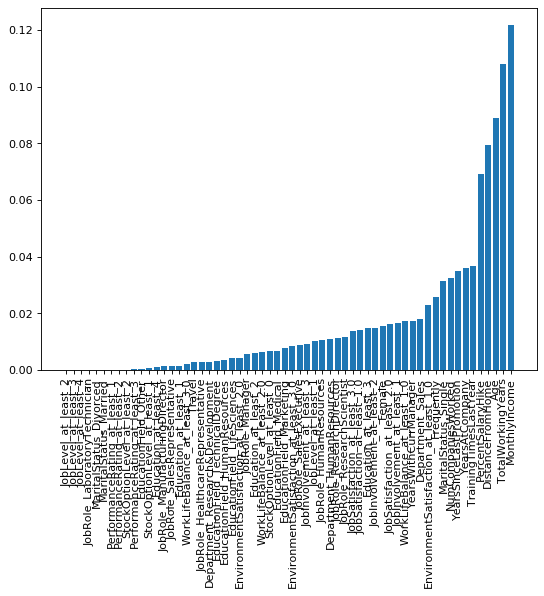

In [0]:
import itertools
labels=finaldata.columns[:-2]
importance=clf.feature_importances_
#lists=sorted(itertools.izip(*[importance,labels]))
new_importance, new_label= zip(*sorted(zip(importance,labels)))
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(new_label,new_importance)
plt.xticks(rotation=90)

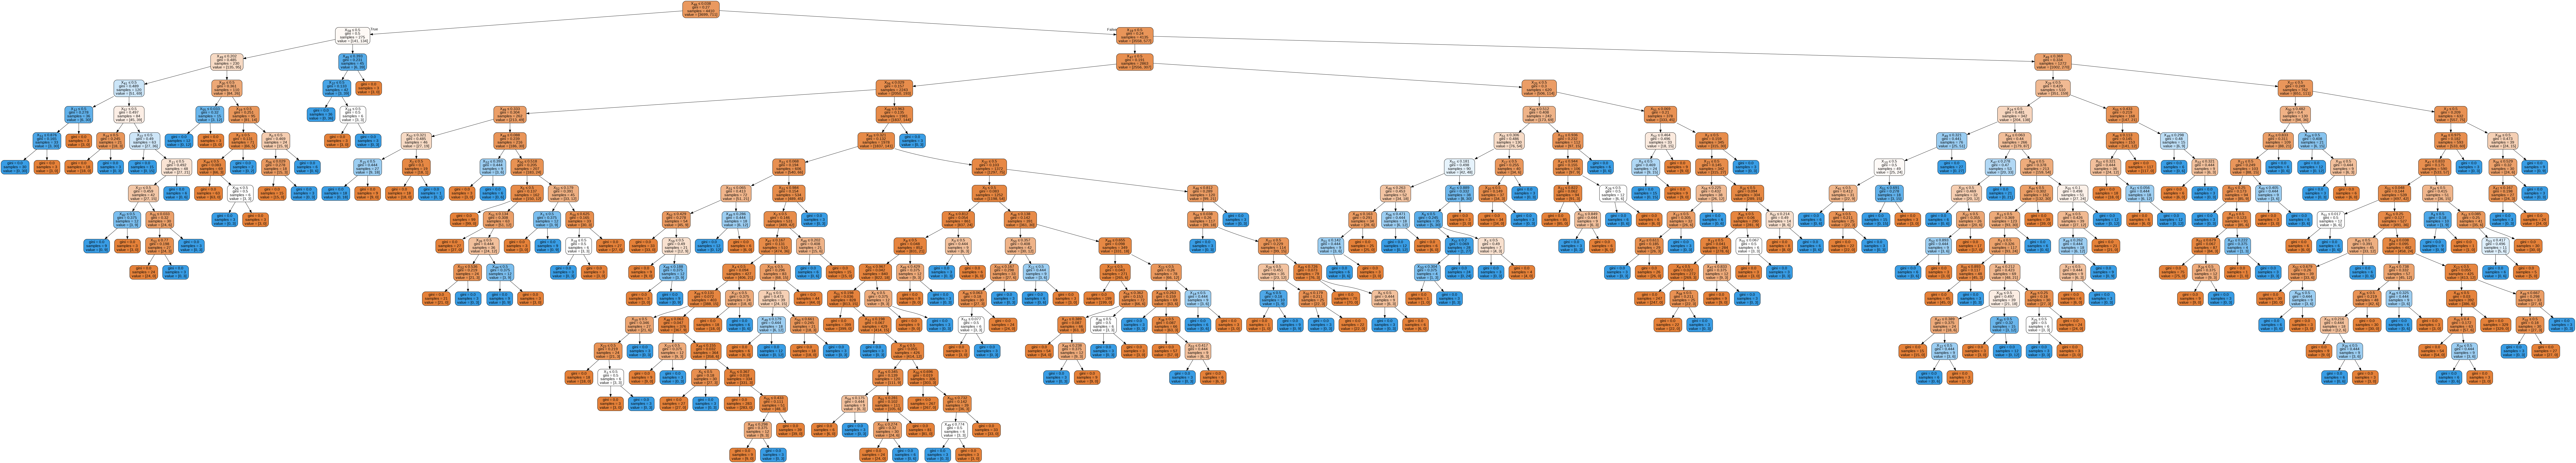

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

***K-Nearest Neighbors***

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2
                           )
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

np.mean(model_selection.cross_val_score(knn, X, y, cv=5))


Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.94


1.0

([<matplotlib.axis.XTick at 0x7fef4bf6ad30>,
 <a list of 5 Text xticklabel objects>)

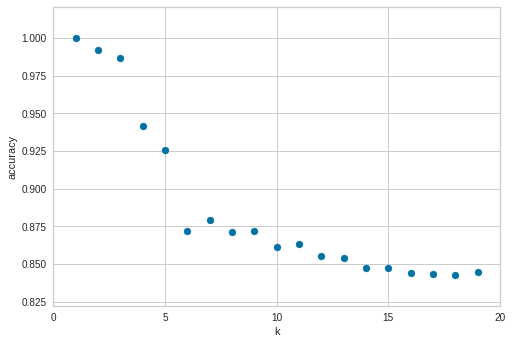

In [0]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.87202718 0.87301587 0.86394558 0.87301587 0.86379115]
cv_scores mean:0.8691591301511012


***Linear Discriminant Analysis***

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.85
Accuracy of LDA classifier on test set: 0.85


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


***Gaussian Naive Bayes***

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.80
Accuracy of GNB classifier on test set: 0.80


***Support Vector Machine***

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.84


In [0]:
from sklearn import model_selection

Cross validation

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

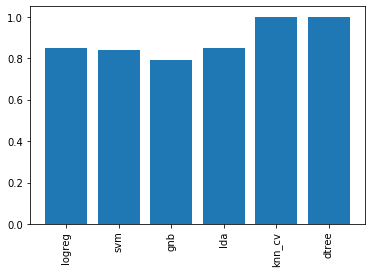

In [0]:
#Models:
logreg = LogisticRegression()
svm = SVC()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
knn_cv = KNeighborsClassifier(n_neighbors=1)
dtree=DecisionTreeClassifier()

Models=[logreg,svm,gnb,lda,knn_cv,dtree]
Model_names=['logreg','svm','gnb','lda','knn_cv','dtree']
crossing_val_score=[]
for x in Models:
  crossing_val_score.append(np.mean(model_selection.cross_val_score(x, X, y, cv=5)))

plt.bar(Model_names,crossing_val_score)
plt.xticks(rotation=90)

In [0]:
crossing_val_score
Model_names=['logreg','svm','gnb','lda','knn_cv','dtree']

[0.8503382591453923,
 0.8387756842240677,
 0.7897963217905644,
 0.8485259983949994,
 1.0,
 0.9986386830402976]

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [0]:
y

0      -1
1       1
2      -1
3      -1
4      -1
       ..
4405   -1
4406   -1
4407   -1
4408   -1
4409   -1
Name: Attrition1, Length: 4410, dtype: int64

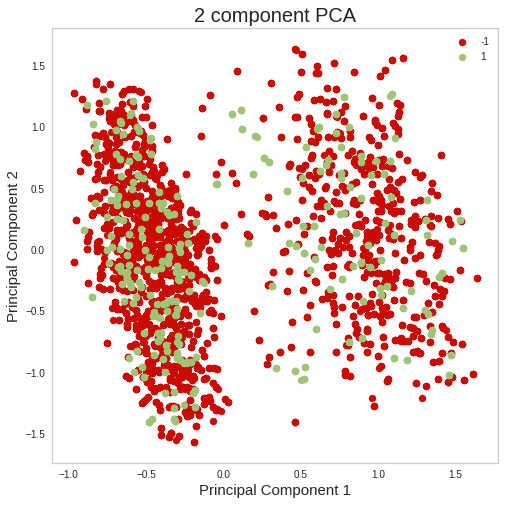

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
##SVM:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [0]:
svc_param_selection(X, y, 5)

{'C': 0.001, 'gamma': 0.001}

In [0]:
c=svm.SVC(C=0.001, kernel='linear',gamma=0.001)
c.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
c.score(X_test, y_test)

0.8449682683590208

In [0]:
np.mean(model_selection.cross_val_score(c, X, y, cv=5))

0.8387756842240677

In [0]:
c.coef_

array([[-3.62921940e-05,  2.61486830e-05,  1.01435110e-05,
         6.34645666e-05, -1.59349915e-04,  3.41564216e-07,
         1.15133255e-06, -6.34223572e-05,  1.57814809e-04,
         8.12884815e-06, -1.09245178e-05, -1.77246838e-05,
        -2.65039990e-05,  5.91750199e-05,  9.27215935e-05,
        -2.99634053e-05, -9.99414823e-06, -6.49147074e-05,
        -7.43659683e-05,  2.09257466e-04, -1.34891498e-04,
        -2.98680489e-04, -6.02792950e-05,  1.35059807e-04,
        -1.84139013e-04, -8.50675838e-06, -1.26094776e-04,
        -1.82758092e-04,  5.22574152e-05, -9.74396179e-05,
        -7.92484165e-06, -2.19457460e-04, -2.26060121e-05,
         0.00000000e+00,  0.00000000e+00, -1.29035695e-04,
        -1.00093231e-04,  4.25307365e-05,  8.67833333e-05,
        -1.59453296e-04,  1.05853025e-05, -1.35545465e-05,
        -7.28373706e-05, -2.07731086e-04, -1.08317075e-04,
        -4.80289263e-05,  0.00000000e+00,  4.22663962e-04,
        -1.47420965e-03, -1.90094493e-04, -1.31206933e-0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

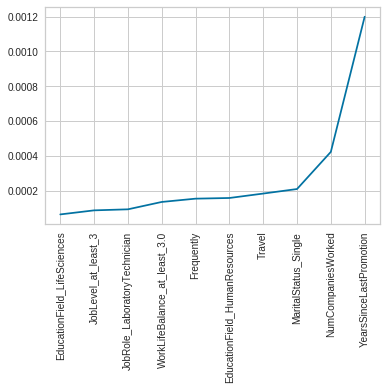

In [0]:
labels=finaldata.columns[:-2]
importance=c.coef_[0,:]
#lists=sorted(itertools.izip(*[importance,labels]))
new_importance, new_label= zip(*sorted(zip(importance,labels)))
plt.plot(new_label[50:],new_importance[50:])
plt.xticks(rotation=90)

In [0]:
importance=[c.coef_[i] for i in range(len(c.coef_))]

In [0]:
c.coef_[0,:]

array([-3.62921940e-05,  2.61486830e-05,  1.01435110e-05,  6.34645666e-05,
       -1.59349915e-04,  3.41564216e-07,  1.15133255e-06, -6.34223572e-05,
        1.57814809e-04,  8.12884815e-06, -1.09245178e-05, -1.77246838e-05,
       -2.65039990e-05,  5.91750199e-05,  9.27215935e-05, -2.99634053e-05,
       -9.99414823e-06, -6.49147074e-05, -7.43659683e-05,  2.09257466e-04,
       -1.34891498e-04, -2.98680489e-04, -6.02792950e-05,  1.35059807e-04,
       -1.84139013e-04, -8.50675838e-06, -1.26094776e-04, -1.82758092e-04,
        5.22574152e-05, -9.74396179e-05, -7.92484165e-06, -2.19457460e-04,
       -2.26060121e-05,  0.00000000e+00,  0.00000000e+00, -1.29035695e-04,
       -1.00093231e-04,  4.25307365e-05,  8.67833333e-05, -1.59453296e-04,
        1.05853025e-05, -1.35545465e-05, -7.28373706e-05, -2.07731086e-04,
       -1.08317075e-04, -4.80289263e-05,  0.00000000e+00,  4.22663962e-04,
       -1.47420965e-03, -1.90094493e-04, -1.31206933e-05, -1.24374830e-04,
       -1.48720654e-04, -